<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/leaf_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificazione di Foglie

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle as shuffle_func

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D

In [2]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2020-06-25 12:27:23--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>] 137.15M  56.9MB/s    in 2.4s    

2020-06-25 12:27:26 (56.9 MB/s) - ‘train.zip.1’ saved [143812152/143812152]

--2020-06-25 12:27:27--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip.1’

validation.zip.1    100%[===================>]  17.65M   116MB/s

In [3]:
!unzip -qq train.zip
!unzip -qq validation.zip
!unzip -qq test.zip

replace train/healthy/healthy_train.265.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace train/healthy/healthy_train.265.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A
replace validation/healthy/healthy_val.6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
replace test/healthy/healthy_test.21.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
IMG_SIZE = (228, 228)
BATCH_SIZE = 256
EPOCHS = 100

In [5]:
def load_data(path="/", shuffle=True):

  imgs = []
  labels = []
  label_to_int = {}
  for i, label in enumerate(os.listdir(path)):

    label_to_int[label] = i

    for img_file in os.listdir(path+label):

      img = cv2.imread(path+label+"/"+img_file)
      
      if img is None:
        continue
        
      img = cv2.resize(img, IMG_SIZE)
      imgs.append(img)
      labels.append(i)

  imgs = np.array(imgs)
  labels = np.array(labels)

  if shuffle:
    imgs, labels = shuffle_func(imgs, labels)

  return imgs, labels, label_to_int

In [6]:
imgs_train, labels_train, label_to_int = load_data(path="train/")
imgs_valid, labels_valid, _ = load_data(path="validation/")
imgs_test, labels_test, _ = load_data(path="test/")

print(label_to_int)

{'healthy': 0, 'angular_leaf_spot': 1, 'bean_rust': 2}


2


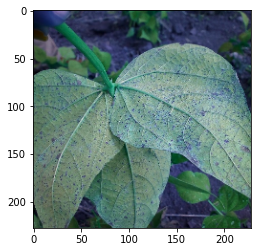

In [7]:
plt.imshow(imgs_train[0])
print(labels_train[0])

In [8]:
X_train = imgs_train/255
X_valid = imgs_valid/255
X_test = imgs_test/255

In [80]:
Y_train = tf.one_hot(labels_train, 3).numpy()
Y_valid = tf.one_hot(labels_valid, 3).numpy()
Y_test = tf.one_hot(labels_test, 3).numpy()

In [85]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [86]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 228, 228, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 76, 76, 64)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 76, 76, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 76, 76, 32)        18464     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 25, 25, 32)      

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data = (X_valid, Y_valid), validation_batch_size=BATCH_SIZE)

Epoch 1/100
5/5 [==============================] - 3s 533ms/step - loss: 1.7214 - accuracy: 0.3279 - val_loss: 1.0970 - val_accuracy: 0.3383
Epoch 2/100
5/5 [==============================] - 2s 487ms/step - loss: 1.1644 - accuracy: 0.3346 - val_loss: 1.0983 - val_accuracy: 0.3383
Epoch 3/100
5/5 [==============================] - 2s 485ms/step - loss: 1.1062 - accuracy: 0.3424 - val_loss: 1.0981 - val_accuracy: 0.3383
Epoch 4/100
5/5 [==============================] - 2s 488ms/step - loss: 1.1038 - accuracy: 0.3279 - val_loss: 1.0981 - val_accuracy: 0.4135
Epoch 5/100
5/5 [==============================] - 2s 491ms/step - loss: 1.0954 - accuracy: 0.3375 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 6/100
5/5 [==============================] - 2s 484ms/step - loss: 1.0957 - accuracy: 0.3511 - val_loss: 1.0986 - val_accuracy: 0.3308
Epoch 7/100
5/5 [==============================] - 2s 478ms/step - loss: 1.0956 - accuracy: 0.3743 - val_loss: 1.0984 - val_accuracy: 0.3308
Epoch 8/100
5

In [84]:
metrics_train = model.evaluate(X_train, Y_train, verbose=0)
metrics_test = model.evaluate(X_test, Y_test, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Train Accuracy = 0.9739 - Train Loss = 0.1339
Test Accuracy = 0.7891 - Test Loss = 0.4853
